In [276]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/countries-continents/countries_continents.csv


In [277]:
#Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [278]:
#Storing and reading the data.

fileName = "/kaggle/input/countries-continents/countries_continents.csv"

df = pd.read_csv(fileName)

# Understanding the data.

In [279]:
#First 5 rows to undertand the data.
df.head()

,Country,Longitude,Latitude,Continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe


In [280]:
#To ensure the data do not have any null values.
df.isnull().sum()

Country      0
Longitude    0
Latitude     0
Continent    0
dtype: int64

**Based on the results, the data is totally clean. No need to drop any columns.** 


**Q3**

In [281]:
#Converting categorical data to numerical(dummies).
df= pd.get_dummies(data = df ,columns = ['Continent'])

df

,Country,Longitude,Latitude,Continent_Africa,Continent_Antarctica,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_Seven seas (open ocean),Continent_South America
0,Aruba,-69.982677,12.520880,0,0,0,0,1,0,0,0
1,Afghanistan,66.004734,33.835231,0,0,1,0,0,0,0,0
2,Angola,17.537368,-12.293361,1,0,0,0,0,0,0,0
3,Anguilla,-63.064989,18.223959,0,0,0,0,1,0,0,0
4,Albania,20.049834,41.142450,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,0,0,0,0,0,1,0,0
237,Yemen,47.586762,15.909280,0,0,1,0,0,0,0,0
238,South Africa,25.083901,-29.000341,1,0,0,0,0,0,0,0
239,Zambia,27.774759,-13.458242,1,0,0,0,0,0,0,0


**Based on the table , there will be 8 continents.**

Text(0, 0.5, 'Latitude')

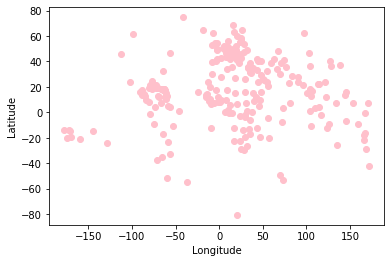

In [282]:
#Scattering tge data (Longitude and Latitude) columns
plt.scatter('Longitude','Latitude', data = df,color ='pink')
plt.xlabel("Longitude")
plt.ylabel("Latitude")


In [283]:
km = KMeans(n_clusters = 8, random_state=1)

km.fit(df[['Longitude','Latitude',]])

y_kmeans = km.predict(df[['Longitude','Latitude']])

#to which label the data belongs.
label = km.labels_


In [284]:
#Finding the centroids
centroid = km.cluster_centers_
centroid

array([[ 152.6452794 ,   -8.60623099],
       [ -69.69558678,    9.13206396],
       [  48.9734064 ,   28.63968616],
       [  -1.26593293,   10.74244542],
       [-162.24003412,  -17.71618937],
       [  11.40565334,   48.98148087],
       [ 106.22861772,   21.22616464],
       [  37.12004106,  -18.25536601]])

**Q5: Plotting**

Text(0.5, 1.0, 'Continents Cluster')

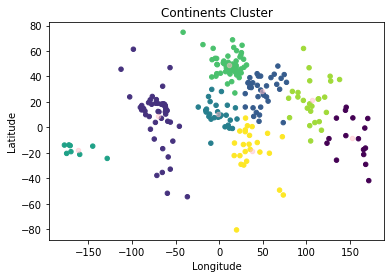

In [286]:
#Plotting
plt.scatter(df[["Longitude"]],df[["Latitude"]], c=label,s=20)
plt.scatter(x=centroid[:,0], y=centroid[:,1],color='Pink', s=20 , alpha= 0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Continents Cluster")


**Q6: Comparing.**

Text(0.5, 1.0, 'Predicted Clusters')

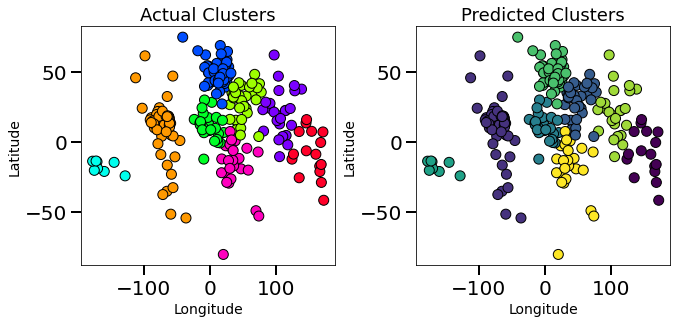

In [291]:
#this will tell us to which cluster does the data observations belong.
new_labels = km.labels_

# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(10,5))

#Set space between the subgraphs.
fig.tight_layout(pad=5.0)

axes[0].scatter(df[["Longitude"]],df[["Latitude"]],c= label, cmap='gist_rainbow',edgecolor='k', s=100)
axes[1].scatter(df[["Longitude"]],df[["Latitude"]], c=new_labels, edgecolor='k', s=100)

axes[0].set_xlabel('Longitude', fontsize=14)
axes[0].set_ylabel('Latitude', fontsize=14)

axes[1].set_xlabel('Longitude', fontsize=14)
axes[1].set_ylabel('Latitude', fontsize=14)

axes[0].tick_params(length=10, width=2, colors='k', labelsize=20)
axes[1].tick_params(length=10, width=2, colors='k', labelsize=20)

axes[0].set_title('Actual Clusters', fontsize=18)
axes[1].set_title('Predicted Clusters', fontsize=18)

So, it is obvious that the actual data have 7 clusters while the predicted contains 8 clusters.